In [1]:
import streamlit as st

In [2]:
import pandas as pd

In [ ]:
st.title('Introduction to pandas, visualizing Titanic,Master 2 TSE, Raphaël Sourty')

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [3]:
df = pd.read_csv('../data/train.csv') #Rajouter les deux points

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [6]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


In [7]:
import matplotlib

<Axes: xlabel='Survived'>

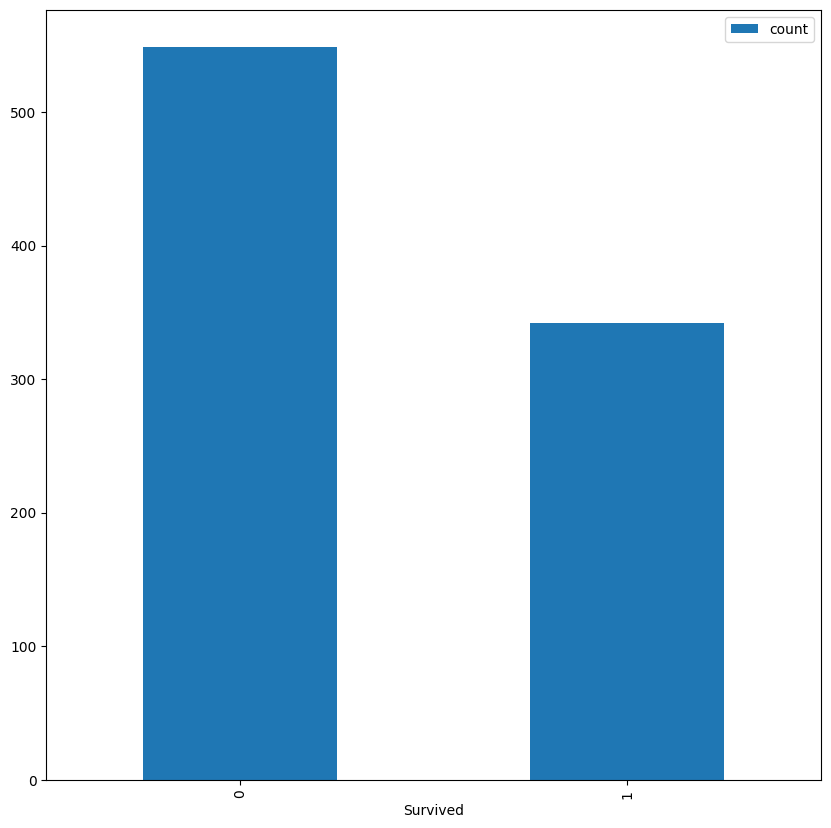

In [8]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [9]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [10]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<Axes: xlabel='Survived'>

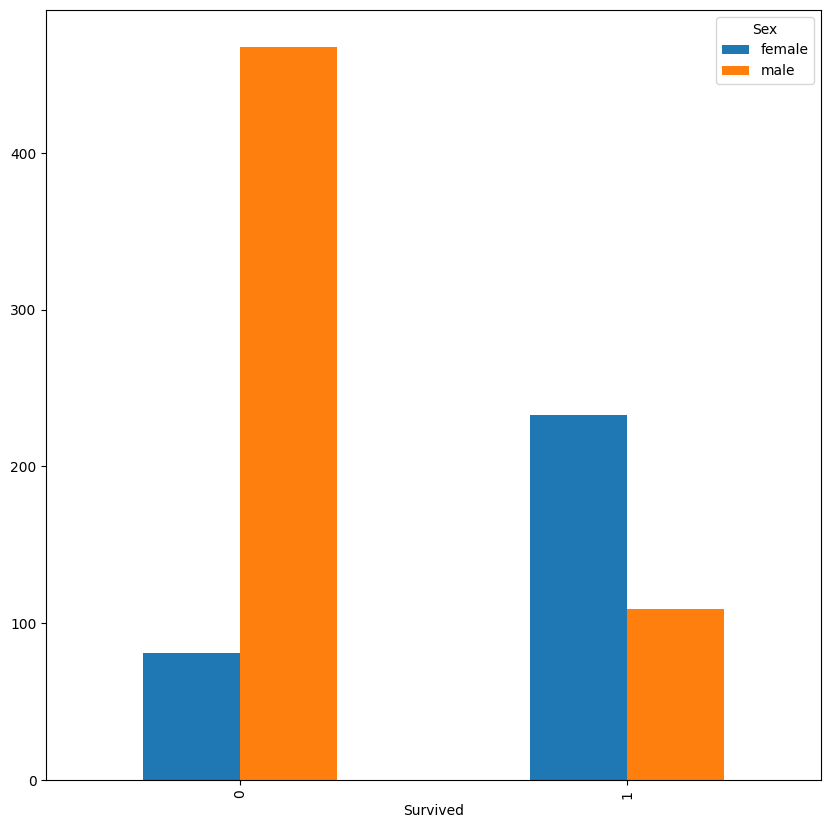

In [11]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))
#unstack pour avoir les plots collés et de différentes couleirs

#### Survival rate depending on Ticket class

In [12]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [13]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

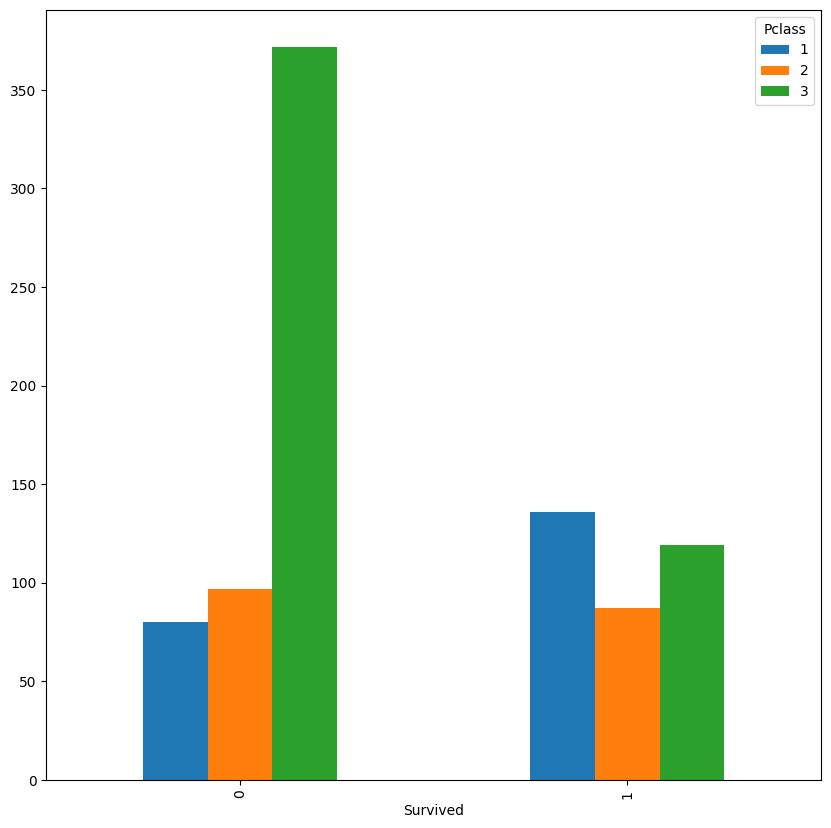

In [14]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [15]:
df['generation'] = pd.cut(df['Age'], 8)
#Sépare en 8 bins

In [16]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"


C:\Users\coral\AppData\Local\Temp\ipykernel_24512\1201001995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='Survived'>

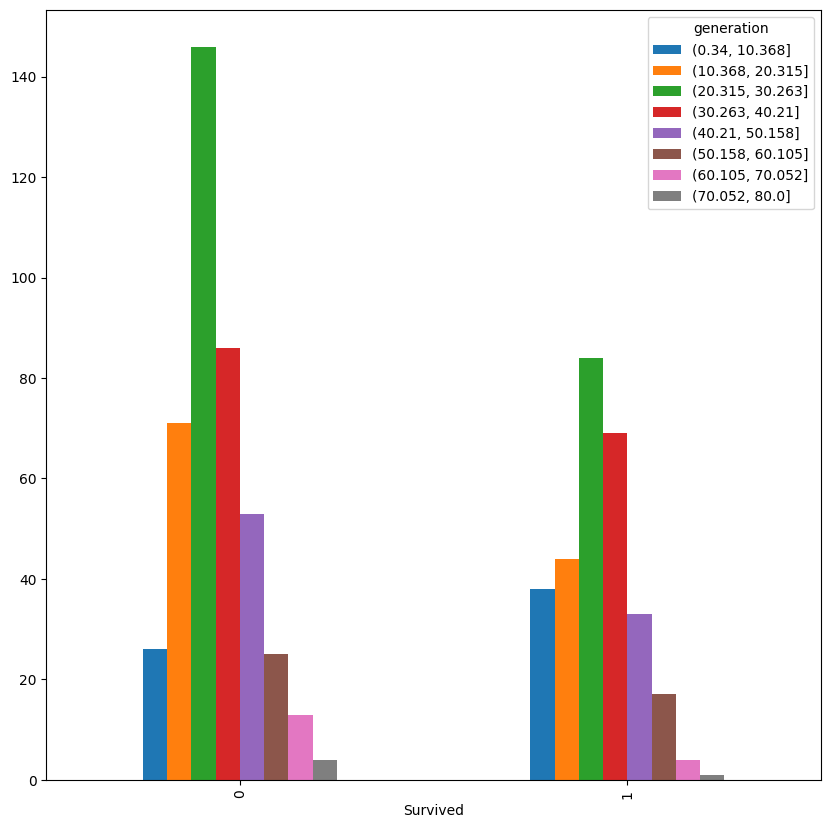

In [18]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [19]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [20]:
pd.cut(df['Fare'], 12)

0      (-0.512, 42.694]
1      (42.694, 85.388]
2      (-0.512, 42.694]
3      (42.694, 85.388]
4      (-0.512, 42.694]
             ...       
886    (-0.512, 42.694]
887    (-0.512, 42.694]
888    (-0.512, 42.694]
889    (-0.512, 42.694]
890    (-0.512, 42.694]
Name: Fare, Length: 891, dtype: category
Categories (12, interval[float64, right]): [(-0.512, 42.694] < (42.694, 85.388] < (85.388, 128.082] < (128.082, 170.776] ... (341.553, 384.247] < (384.247, 426.941] < (426.941, 469.635] < (469.635, 512.329]]

C:\Users\coral\AppData\Local\Temp\ipykernel_24512\2369799790.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


<Axes: xlabel='Survived'>

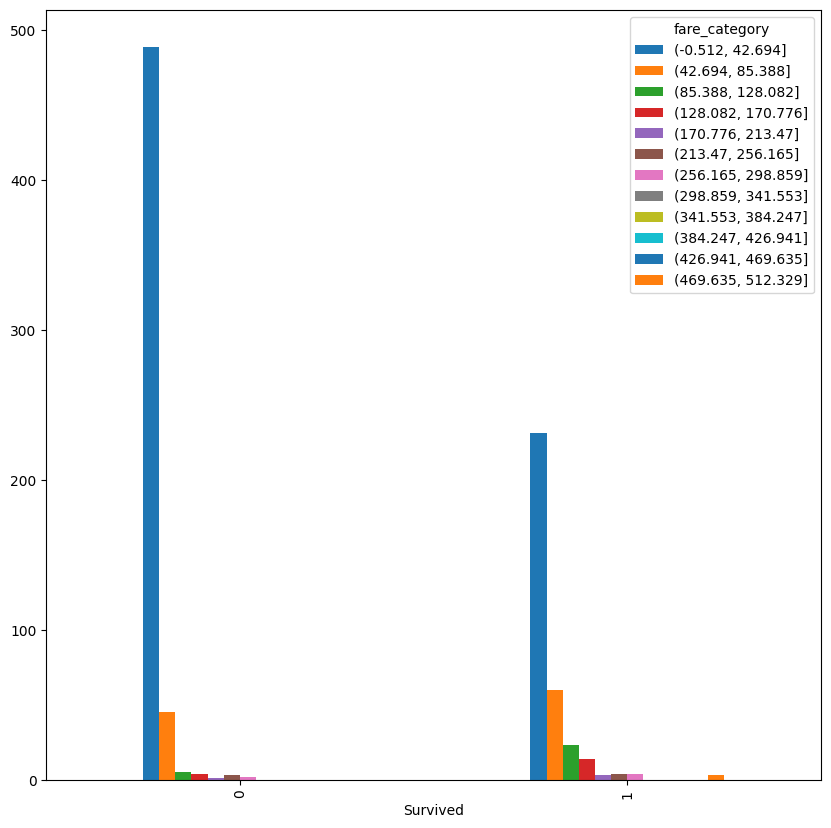

In [21]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [22]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [23]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

In [24]:
# Extraire la partie numérique de la colonne 'Cabin' et gérer les valeurs manquantes
df['Cabin_number'] = df['Cabin'].str.extract('(\d+)')

# Remplacer les NaN par une valeur spécifique (par exemple, -1) avant de convertir en entier
df['Cabin_number'] = df['Cabin_number'].fillna(-1).astype('int')

# Ajouter une colonne 'parité' : 0 pour pair, 1 pour impair, et -1 pour les cabines sans numéro
df['parité'] = df['Cabin_number'].apply(lambda x: x % 2 if x != -1 else -1)

In [25]:
df = df[df['parité'] != -1]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category,Cabin_number,parité
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]",85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]",123,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]",46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]",6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]",103,1


<Axes: xlabel='Survived'>

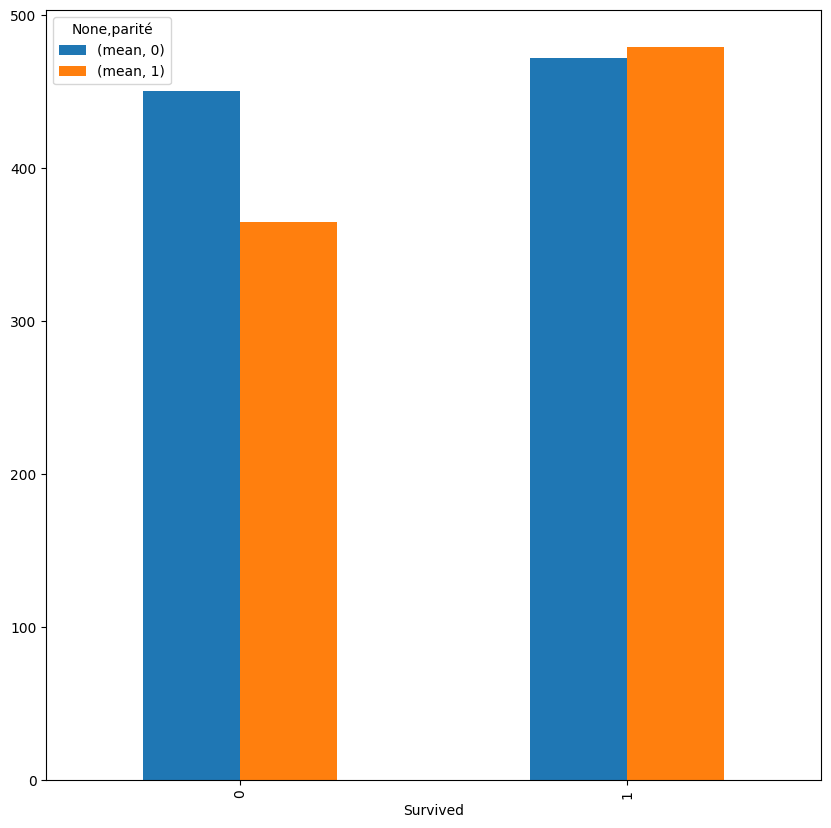

In [27]:
df.groupby(['Survived','parité'])['PassengerId'].agg(['mean']).unstack().plot(kind ='bar', figsize = (10, 10))

In [28]:
df.groupby(['Survived','parité'])['PassengerId'].agg(['count']).unstack()


count    
parité       0   1
Survived          
0           42  24
1           66  68

Best deck to be on:

In [29]:
# Extraire la partie numérique de la colonne 'Cabin' et gérer les valeurs manquantes
df['Cabin_letter'] = df['Cabin'].str.extract('([A-Za-z])')
df = df[df['Cabin_letter'] != -1]

<Axes: xlabel='Survived'>

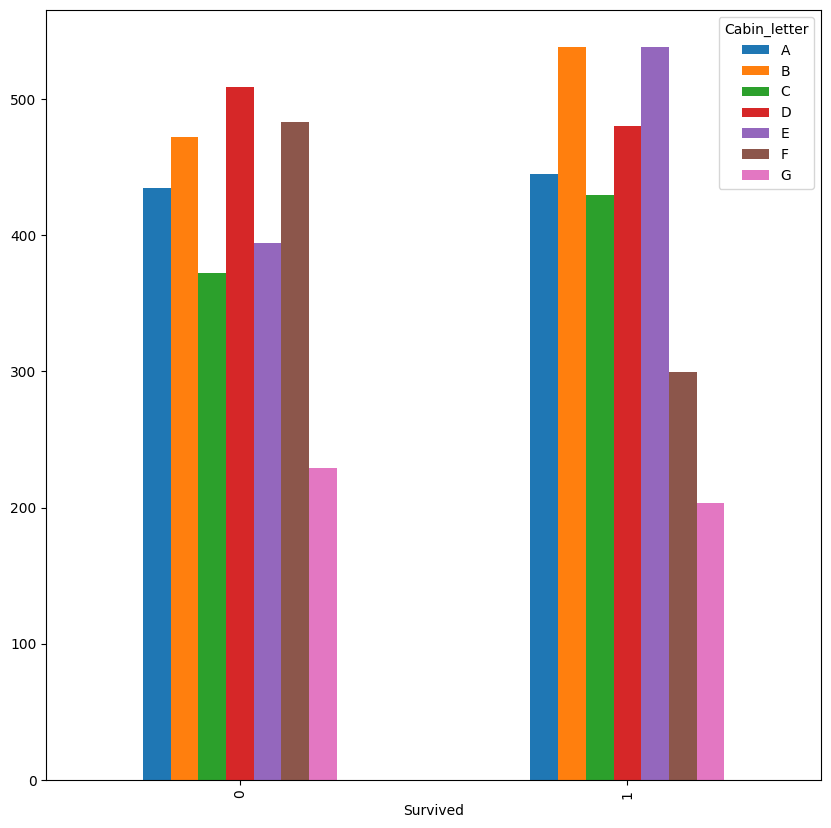

In [30]:
df.groupby(['Survived','Cabin_letter'])['PassengerId'].agg("mean").unstack().plot(kind ='bar', figsize = (10, 10))

In [31]:
df.groupby(['Survived','Cabin_letter'])['PassengerId'].count().unstack()

Cabin_letter,A,B,C,D,E,F,G
Survived,,,,,,,
0,8,12,24,7,8,5,2
1,7,35,35,23,24,8,2


Best place to be located on the boat in general

<Axes: xlabel='Cabin_letter'>

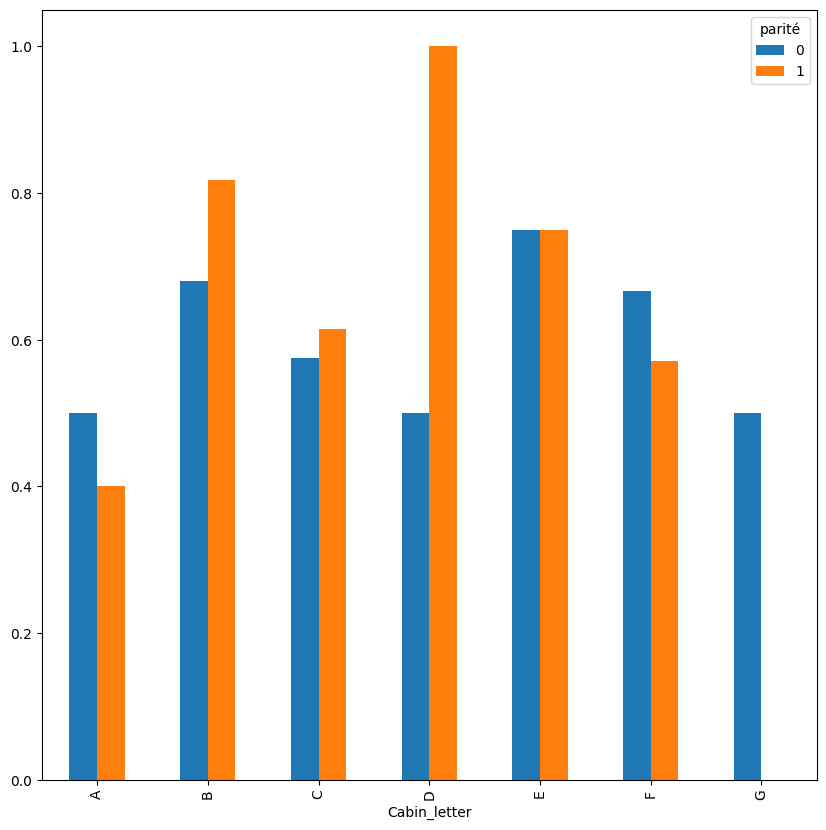

In [38]:
df.groupby(['Cabin_letter', 'parité'])['Survived'].mean().unstack().plot(kind ='bar', figsize = (10, 10))

In [39]:
df.groupby(['Cabin_letter', 'parité'])['Survived'].mean().unstack()

parité,0,1
Cabin_letter,,
A,0.500000,0.400000
B,0.680000,0.818182
C,0.575758,0.615385
D,0.500000,1.000000
E,0.750000,0.750000
F,0.666667,0.571429
G,0.500000,NaN


SibSP and Parch

<Axes: xlabel='Survived'>

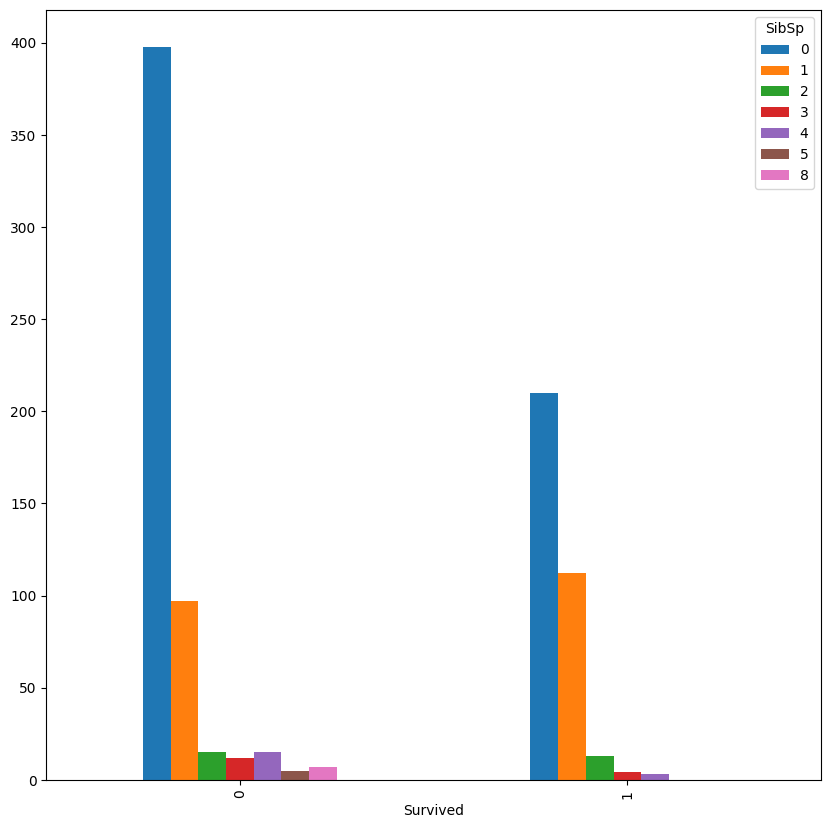

In [73]:
df.groupby(['Survived', 'SibSp'])['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

In [74]:
df.groupby(['Survived', 'SibSp'])['PassengerId'].count().unstack()

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


<Axes: xlabel='Survived'>

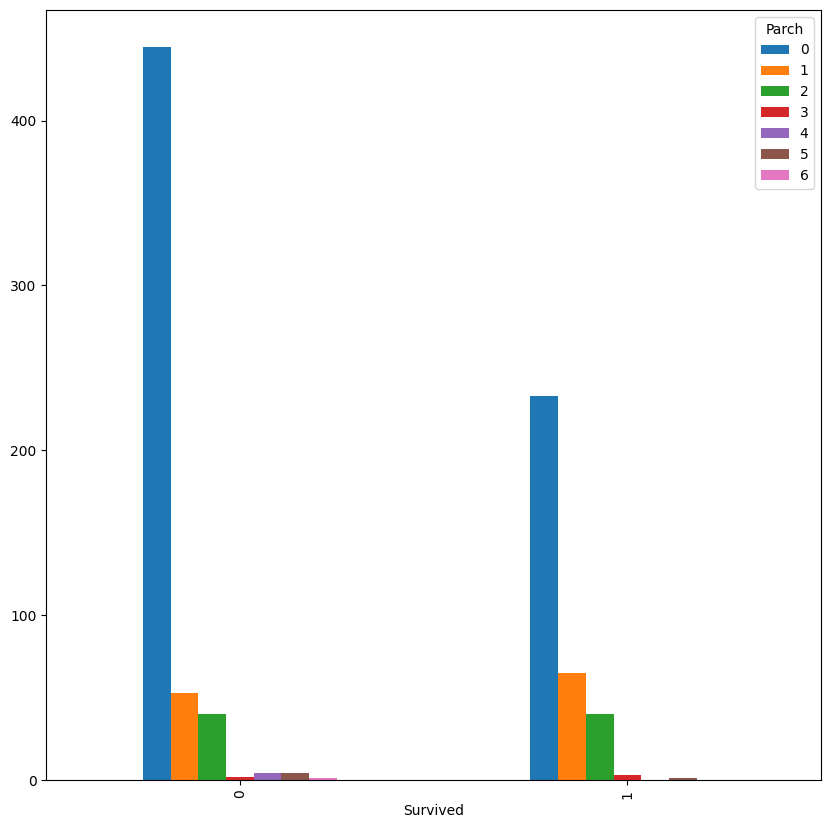

In [75]:
df.groupby(['Survived', 'Parch'])['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))


In [41]:
df.groupby(['Survived', 'Parch'])['PassengerId'].count().unstack()

Parch,0,1,2,4
Survived,,,,
0,48.0,11.0,6.0,1.0
1,89.0,28.0,17.0,NaN


#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?

<Axes: xlabel='SibSp'>

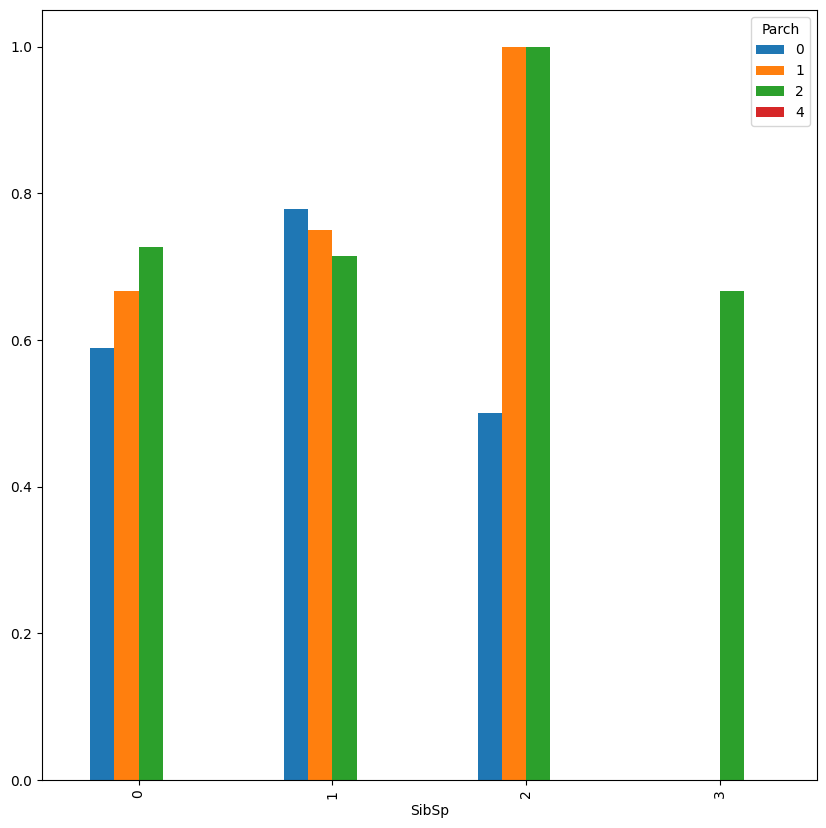

In [43]:
df.groupby(['SibSp', 'Parch'])['Survived'].mean().unstack().plot(kind ='bar', figsize = (10, 10))

In [44]:
df.groupby(['SibSp', 'Parch'])['Survived'].mean().unstack()

Parch,0,1,2,4
SibSp,,,,
0,0.588889,0.666667,0.727273,NaN
1,0.777778,0.750000,0.714286,0.0
2,0.500000,1.000000,1.000000,NaN
3,NaN,NaN,0.666667,NaN
